# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [21]:
# 1- importing 2- displaying  

import pandas as pd
data = pd.read_csv("data/heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [22]:
# Display dataset information
print("\n---- Dataset Information: ----")
print(data.info())

# Print column names
print("\n---- Feature Names: ----")
print(data.columns.tolist())



---- Dataset Information: ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

---- Feature Names: ----
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'H

In [23]:
# 3- summary of the data 
# Display summary statistics
print("\nSummary of the Dataset:")
print(data.describe(include='all'))



Summary of the Dataset:
               Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR Exercise

In [24]:
# 4 check for missing values 

print("\nMissing Values in the Dataset:")
print(data.isnull().sum())



Missing Values in the Dataset:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_21236\116344496.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=data, palette='Set2')


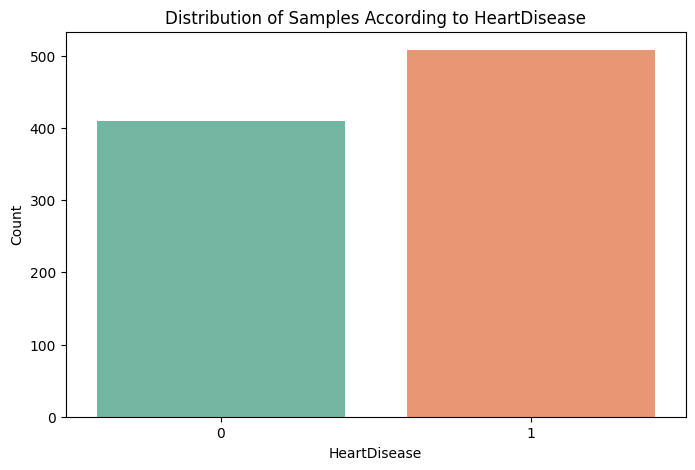


Class Distribution:
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64
Is the dataset balanced? No


In [25]:
# 5 ploting and check balance 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=data, palette='Set2')
plt.title('Distribution of Samples According to HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

# Check class balance
class_distribution = data['HeartDisease'].value_counts(normalize=True)
print("\nClass Distribution:")
print(class_distribution)
balanced = "Yes" if abs(class_distribution[0] - class_distribution[1]) < 0.1 else "No"
print(f"Is the dataset balanced? {balanced}")


In [26]:
# 6 apply dummy encoding 
data_encoded = pd.get_dummies(data, drop_first=True)
print("\nDataset After Dummy Encoding:\n", data_encoded.head())



Dataset After Dummy Encoding:
    Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False 

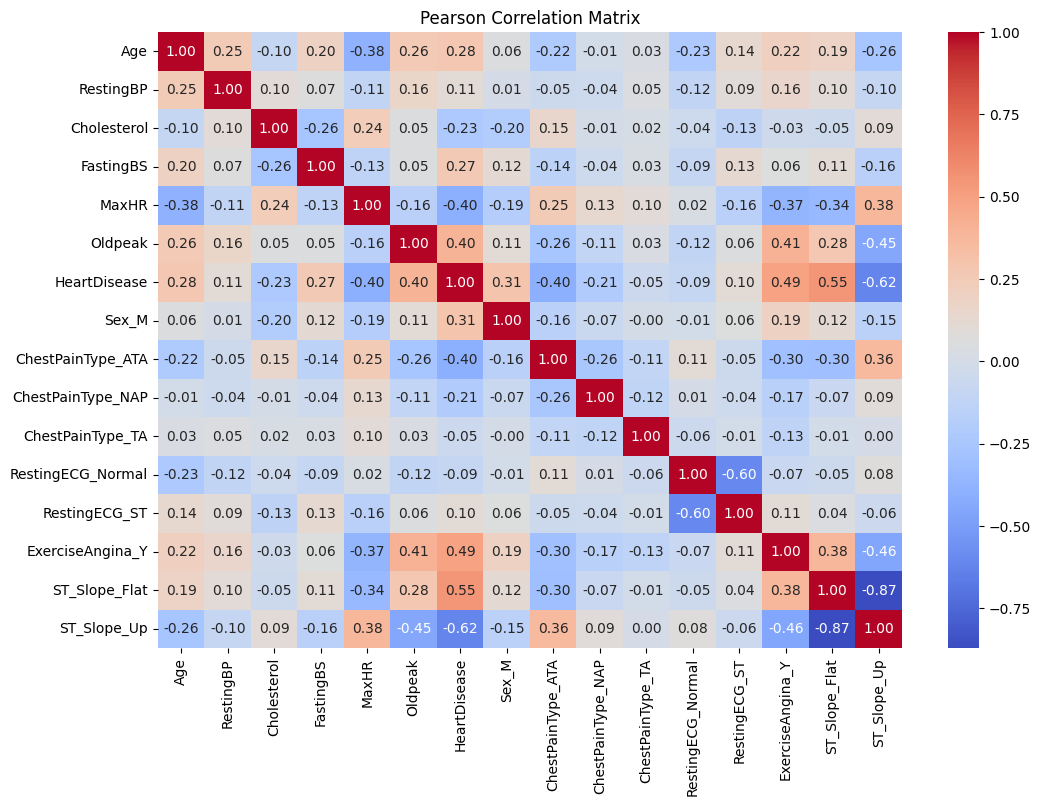


Features Correlated with HeartDisease (|correlation| > 0.5):
HeartDisease     1.000000
ST_Slope_Flat    0.554134
ST_Slope_Up     -0.622164
Name: HeartDisease, dtype: float64


In [27]:
# 7 correlation matrix  with pearson correlation

# Compute the Pearson correlation matrix
correlation_matrix = data_encoded.corr()

# Display the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

# Find features with correlation above 0.5 with the target
correlation_with_target = correlation_matrix['HeartDisease']
high_corr_features = correlation_with_target[abs(correlation_with_target) > 0.5]
print("\nFeatures Correlated with HeartDisease (|correlation| > 0.5):")
print(high_corr_features)


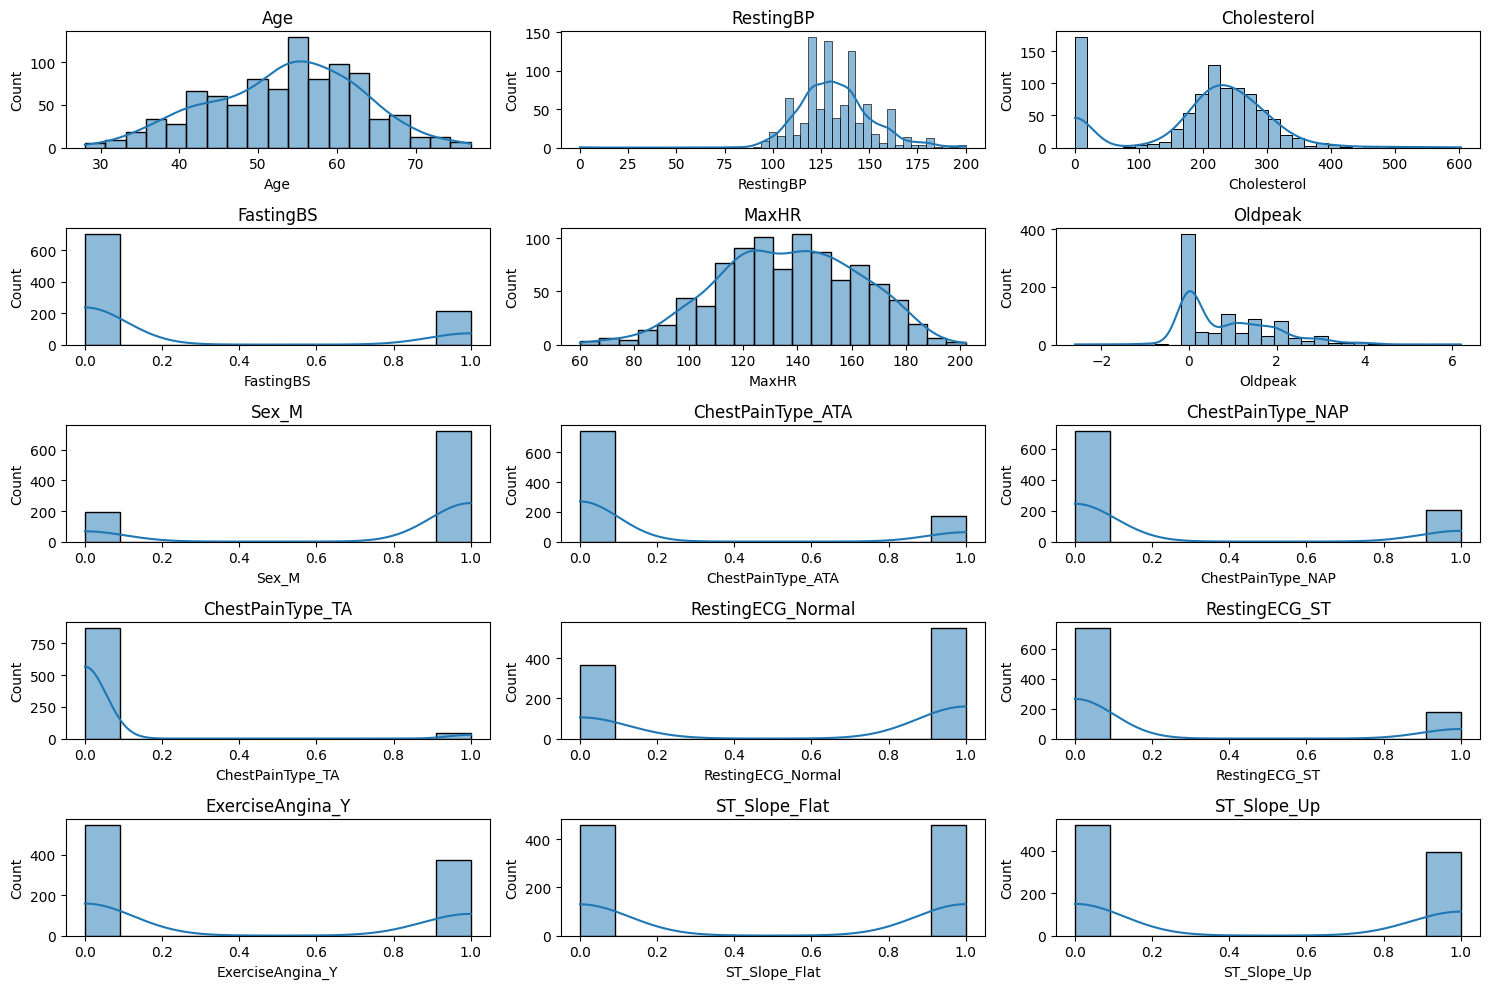

In [28]:
# 8 distribution of features on scaled data 
# Exclude binary features for distribution analysis
binary_features = ['HeartDisease']  # Add other binary features if applicable
non_binary_features = [col for col in data_encoded.columns if col not in binary_features]

# Plot the distribution of non-binary features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(non_binary_features):
    plt.subplot((len(non_binary_features) + 2) // 3, 3, i + 1)
    sns.histplot(data_encoded[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


In [29]:
# 9 splitting data into training and test sets

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

X_test


Training Set Size: (642, 15)
Testing Set Size: (276, 15)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
351,43,140,0,0,140,0.5,True,False,False,False,False,True,True,False,True
596,57,122,264,0,100,0.0,True,False,False,False,False,False,False,True,False
491,75,170,203,1,108,0.0,True,False,False,False,False,True,False,True,False
794,50,129,196,0,163,0.0,True,False,True,False,True,False,False,False,True
544,61,140,298,1,120,0.0,False,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,130,0,0,122,1.0,True,False,False,False,False,False,True,True,False
503,51,132,227,1,138,0.2,True,False,False,False,False,True,False,False,True
271,32,105,198,0,165,0.0,False,True,False,False,True,False,False,False,True
372,63,185,0,0,98,0.0,True,False,False,False,True,False,True,False,True


In [30]:
# 10 normalizing data using z-score
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()

# Fit the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nScaled Training Data (First 5 Rows):")
X_train_scaled



Scaled Training Data (First 5 Rows):


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
335,0.856064,-0.672618,-1.882352,1.868023,-0.082372,-1.563271,0.520852,-0.467136,-0.520852,4.102845,-1.248106,-0.484371,-0.841099,0.98148,-0.851943
368,0.331343,0.435467,-1.882352,-0.535325,-0.629164,1.037503,0.520852,-0.467136,-0.520852,-0.243733,0.801214,-0.484371,1.188921,0.98148,-0.851943
111,0.331343,0.989510,0.489677,-0.535325,-1.722749,1.966351,0.520852,-0.467136,-0.520852,-0.243733,0.801214,-0.484371,1.188921,0.98148,-0.851943
336,1.905508,1.543553,-1.882352,-0.535325,-0.863504,0.665964,0.520852,-0.467136,1.919930,-0.243733,-1.248106,-0.484371,-0.841099,0.98148,-0.851943
479,0.226399,2.097596,-1.882352,-0.535325,-0.511994,1.501927,0.520852,-0.467136,1.919930,-0.243733,-1.248106,-0.484371,1.188921,0.98148,-0.851943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,-1.977432,-0.672618,-1.882352,1.868023,-0.238598,0.294425,0.520852,-0.467136,-0.520852,-0.243733,0.801214,-0.484371,1.188921,0.98148,-0.851943
438,0.961009,-0.118576,-1.882352,-0.535325,-0.980673,-0.820193,0.520852,-0.467136,1.919930,-0.243733,-1.248106,2.064533,1.188921,0.98148,-0.851943
93,-0.613156,1.543553,1.178031,-0.535325,-1.722749,0.573079,0.520852,-0.467136,-0.520852,-0.243733,0.801214,-0.484371,1.188921,0.98148,-0.851943
722,0.646176,0.989510,0.517584,-0.535325,0.815930,1.594812,-1.919930,-0.467136,-0.520852,-0.243733,-1.248106,-0.484371,-0.841099,0.98148,-0.851943


### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [31]:
#  1- ---- training the data : 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# a- Gaussian Naive Bayes : 
# Training
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# b- KNN N= 3 : 
# Training
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# c- decision tree with max depth = 6 : 
# Training
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

Decision Tree:
 |--- ST_Slope_Up <= 0.16
|   |--- MaxHR <= 0.25
|   |   |--- Sex_M <= -0.70
|   |   |   |--- Age <= 1.38
|   |   |   |   |--- ChestPainType_TA <= 1.93
|   |   |   |   |   |--- MaxHR <= -0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- MaxHR >  -0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ChestPainType_TA >  1.93
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  1.38
|   |   |   |   |--- class: 0
|   |   |--- Sex_M >  -0.70
|   |   |   |--- ChestPainType_NAP <= 0.70
|   |   |   |   |--- Age <= 2.17
|   |   |   |   |   |--- Cholesterol <= -0.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Cholesterol >  -0.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  2.17
|   |   |   |   |   |--- class: 0
|   |   |   |--- ChestPainType_NAP >  0.70
|   |   |   |   |--- MaxHR <= -0.02
|   |   |   |   |   |--- Age <= 1.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  1.12
|   |   

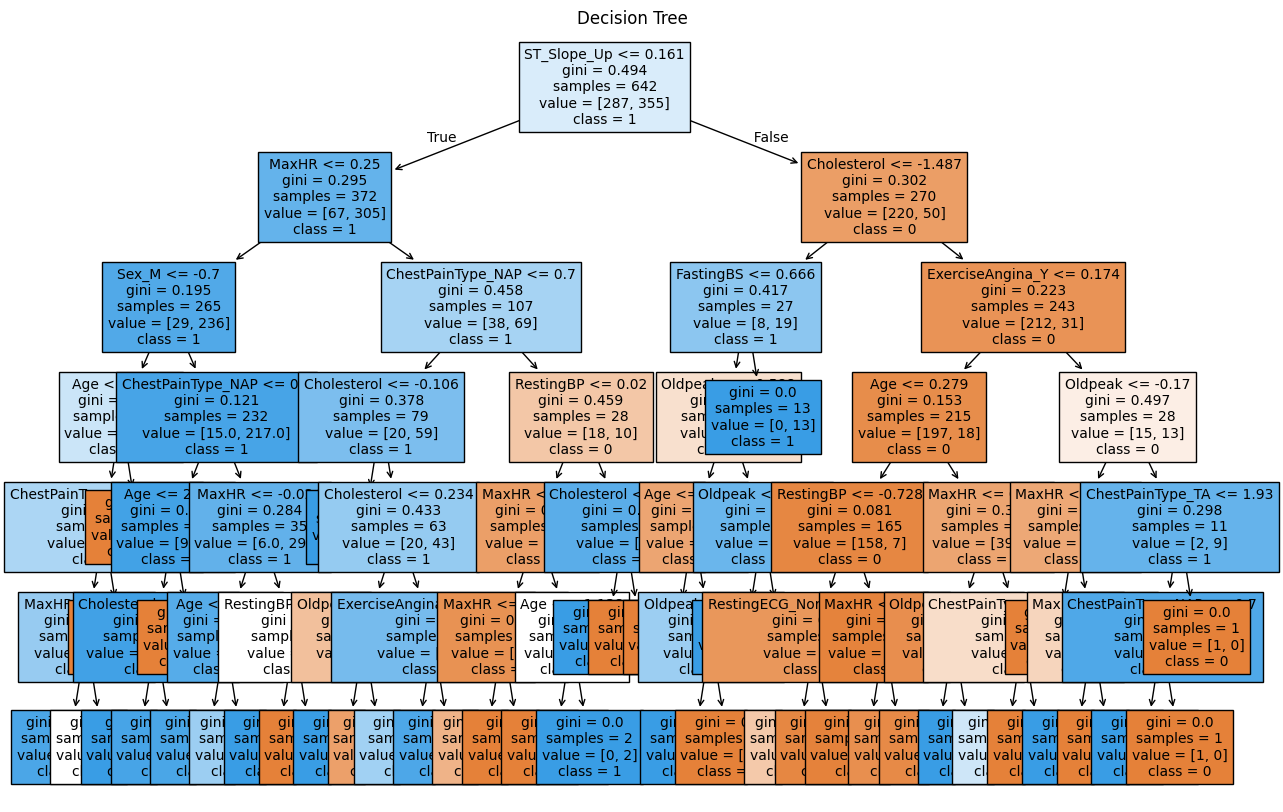

In [32]:
# 2- ---- displaying the decision tree and save it 
from sklearn.tree import export_text, plot_tree

# Display the tree structure in text form
print("Decision Tree:\n", export_text(dt, feature_names=X.columns.tolist()))

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=[str(cls) for cls in dt.classes_], filled=True, fontsize=10)
plt.title("Decision Tree")
plt.savefig("decision_tree.png")  # Save the tree as an image
plt.show()


In [33]:

X_train_scaled = X_train_scaled.values
X_test_scaled = X_test_scaled.values

X_train_scaled.shape


(642, 15)

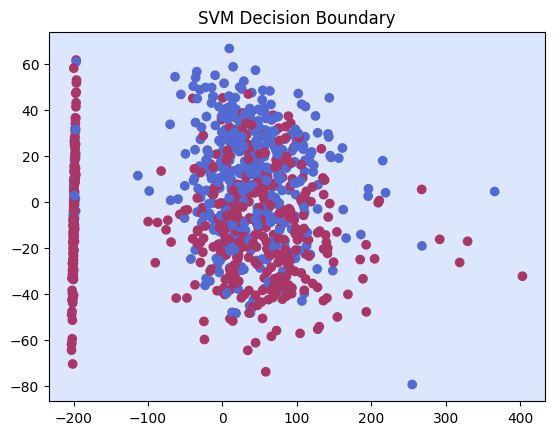

In [34]:
# 3- ---- implementing the SVM from scratch :
import numpy as np
from sklearn.datasets import make_classification

class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate           # Learning rate for gradient descent
        self.lambda_param = lambda_param  # Regularization parameter
        self.n_iters = n_iters            # Number of iterations
        self.w = None                     # Weights
        self.b = None                     # Bias

    def fit(self, X, y):
        """
        Train the SVM model.
        Args:
        - X: Input features, shape (n_samples, n_features)
        - y: Labels, shape (n_samples,)
        """
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0.5, 0, 1)  # Convert labels to 0 and 1

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Update weights for correctly classified points
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update weights and bias for misclassified points
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        """
        Predict the class labels.
        Args:
        - X: Input features, shape (n_samples, n_features)
        Returns:
        - Predicted labels, shape (n_samples,)
        """
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

#-----


# Convert labels to 0 and 1 for compatibility
y = np.where(y == 0, -1, 1).astype(int)

#-----
# Initialize and train the SVM model
svm = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test_scaled)


# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    ax = plt.gca()

    # Create grid
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50),
        np.linspace(ylim[0], ylim[1], 50)
    )

    # Compute the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.title("SVM Decision Boundary")
    plt.show()

from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Train on reduced data
svm = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
svm.fit(X_2d, y)

# Visualize decision boundary
plot_decision_boundary(X_2d, y, svm)

In [35]:
# 4- ---- parint classification report and confusion matrces
from sklearn.metrics import classification_report, confusion_matrix

# Gaussian Naive Bayes
y_pred_gnb = gnb.predict(X_test_scaled)
print("Gaussian Naive Bayes Report:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))

# k-NN
y_pred_knn = knn.predict(X_test_scaled)
print("\nk-NN (k=3) Report:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Decision Tree
y_pred_dt = dt.predict(X_test_scaled)
print("\nDecision Tree Report:")
print("\nClassification Report:")

print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# SVM
print("\nSVM Report:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Gaussian Naive Bayes Report:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       123
           1       0.92      0.90      0.91       153

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276

Confusion Matrix:
 [[111  12]
 [ 15 138]]

k-NN (k=3) Report:

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       123
           1       0.90      0.90      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

Confusion Matrix:
 [[108  15]
 [ 15 138]]

Decision Tree Report:

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       123
         

c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Use

c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


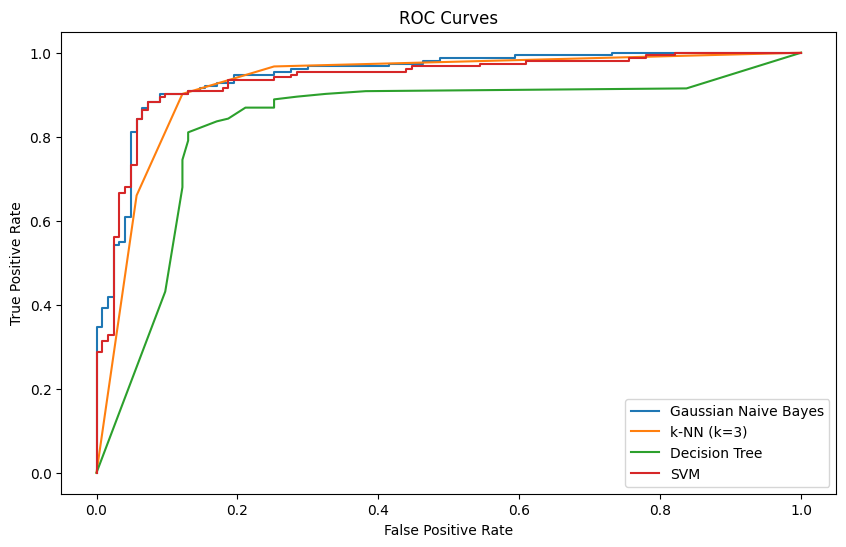

In [37]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Train SVM with probability=True to get probabilities
svm = SVC(probability=True, kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Compute probabilities for SVM
y_pred_svm_prob = svm.predict_proba(X_test_scaled)[:, 1]

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))

# Gaussian Naive Bayes
y_pred_gnb_prob = gnb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_gnb_prob)
plt.plot(fpr, tpr, label='Gaussian Naive Bayes')

# k-NN
y_pred_knn_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_knn_prob)
plt.plot(fpr, tpr, label='k-NN (k=3)')

# Decision Tree
y_pred_dt_prob = dt.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_dt_prob)
plt.plot(fpr, tpr, label='Decision Tree')

# SVM
fpr, tpr, _ = roc_curve(y_test, y_pred_svm_prob)
plt.plot(fpr, tpr, label='SVM')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [ ]:
# 6- ---- 
# the metrics i recommed are the ROC or the accuracy because our data are balanced 

# 7- ---- predicting on the class from the third sample 
index = 2  # Third sample
best_model = gnb 
sample = X_test.iloc[index]
predicted_class = best_model.predict([sample])[0]
print(f"Predicted class for the third sample: {predicted_class}")


Predicted class for the third sample: 1


c:\Users\TRETEC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# 8- ---- making cross-validation
from sklearn.model_selection import cross_val_score

# cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')  # Replace scoring as needed
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.86413043 0.88586957 0.83695652 0.84153005 0.75956284]
Mean CV Score: 0.8376098835827988
